# DATA EXPLORATION

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_excel('/Users/shubhhammm25/Desktop/Custom Retain/CustomRetain.xlsx')
df.head(5)

CustomerID        Name  Age  Gender  Location  Subscription_Length_Months  \
0           1  Customer_1   56    Male     Urban                          29   
1           2  Customer_2   69  Female     Rural                          24   
2           3  Customer_3   46  Female  Suburban                          14   
3           4  Customer_4   32  Female     Urban                          14   
4           5  Customer_5   60    Male  Suburban                          25   

   Monthly_Bill  Average_Internet_Usage  No_of_Tickets  \
0    286.658992               24.945633              0   
1    706.286532              241.090001              1   
2   1070.546459              279.855149              0   
3    338.363834               40.517955              2   
4    835.573690              122.903374              0   

   Average_Talktime_Usage  Social_Class Subscription_Type  Base_Charge  
0               23.316484             1                 A          100  
1               97.662416             2                 C          300  
2              154.816437             3                 D          400  
3              125.948657             1                 B          200  
4              289.171509             2                 C          300

In [4]:
print("Basic Information about the Dataset:")
print(df.info())
print("\n")

Basic Information about the Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CustomerID                  10000 non-null  int64  
 1   Name                        10000 non-null  object 
 2   Age                         10000 non-null  int64  
 3   Gender                      10000 non-null  object 
 4   Location                    10000 non-null  object 
 5   Subscription_Length_Months  10000 non-null  int64  
 6   Monthly_Bill                10000 non-null  float64
 7   Average_Internet_Usage      10000 non-null  float64
 8   No_of_Tickets               10000 non-null  int64  
 9   Average_Talktime_Usage      10000 non-null  float64
 10  Social_Class                10000 non-null  int64  
 11  Subscription_Type           10000 non-null  object 
 12  Base_Charge                 10000 non-null  int64  


In [5]:
print("Summary Statistics for Numerical Features:")
print(df.describe())
print("\n")

Summary Statistics for Numerical Features:
        CustomerID           Age  Subscription_Length_Months  Monthly_Bill  \
count  10000.00000  10000.000000                10000.000000  10000.000000   
mean    5000.50000     43.539400                   18.098100    843.241933   
std     2886.89568     14.911636                   10.012477    373.748328   
min        1.00000     18.000000                    1.000000    200.007198   
25%     2500.75000     31.000000                   10.000000    517.962133   
50%     5000.50000     43.000000                   18.000000    844.425447   
75%     7500.25000     56.000000                   27.000000   1162.889810   
max    10000.00000     69.000000                   35.000000   1499.726183   

       Average_Internet_Usage  No_of_Tickets  Average_Talktime_Usage  \
count            10000.000000   10000.000000            10000.000000   
mean               182.289010       0.605500              182.220333   
std                143.480494       0.

In [6]:
print("Distribution of Subscription Types:")
print(df['Subscription_Type'].value_counts())
print("\n")

Distribution of Subscription Types:
B    2402
C    2281
E    2232
D    1567
A    1518
Name: Subscription_Type, dtype: int64




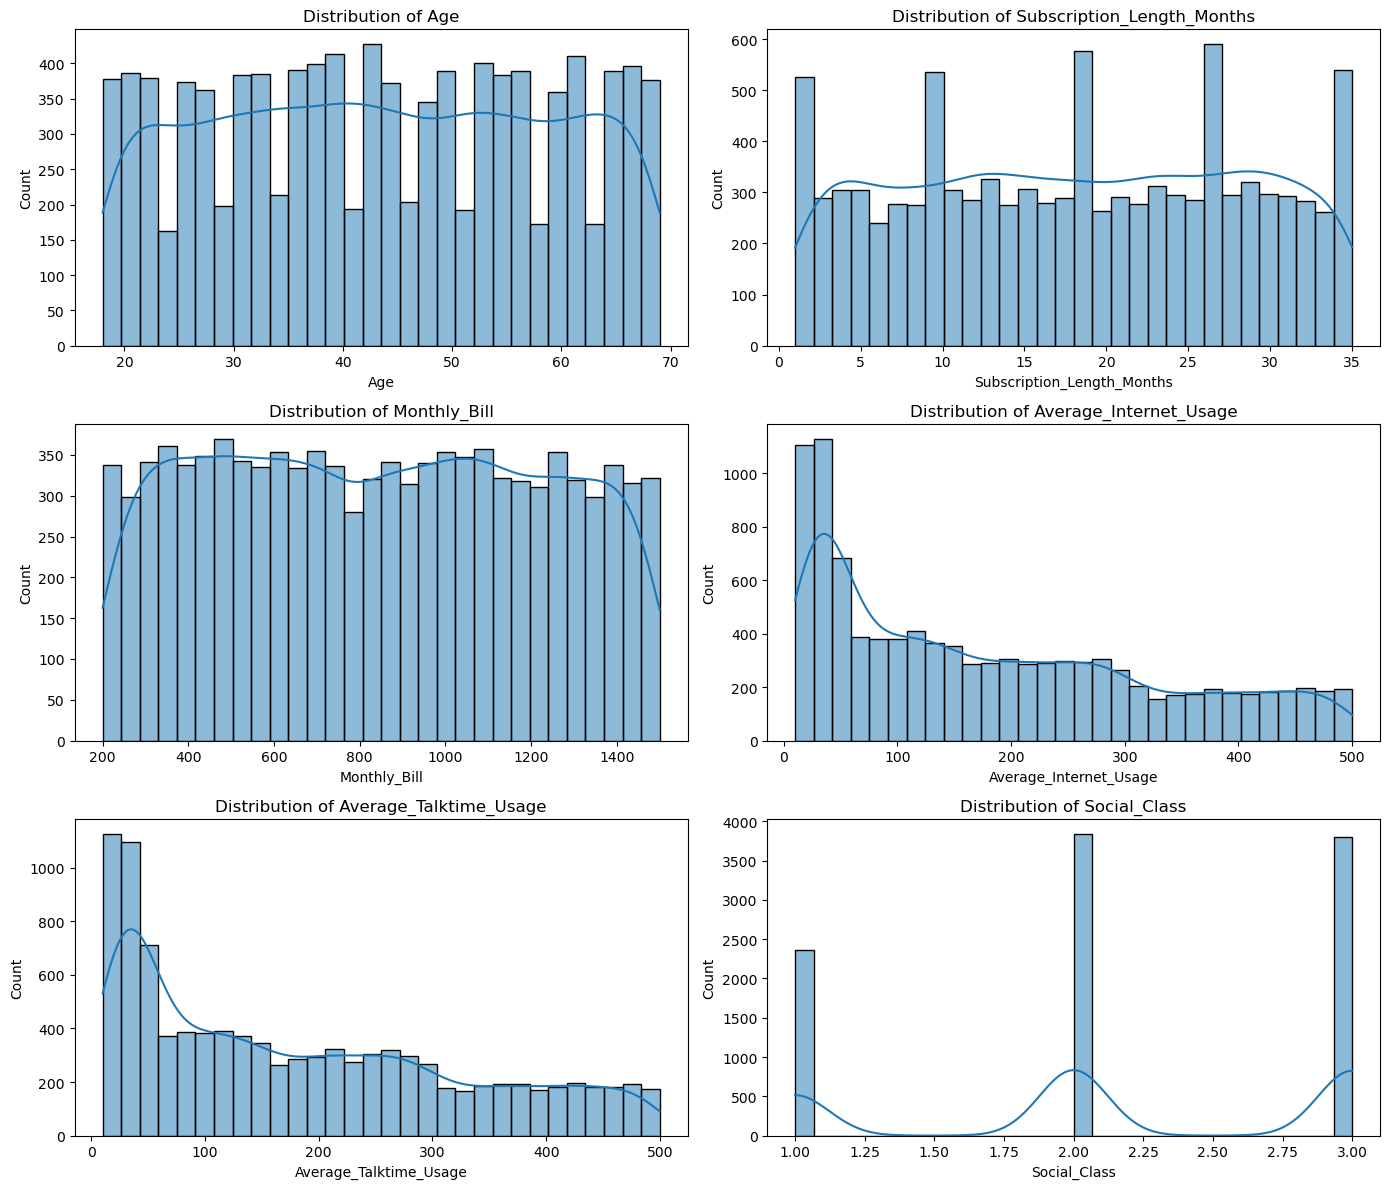

In [7]:
numerical_features = ['Age', 'Subscription_Length_Months', 'Monthly_Bill', 
                      'Average_Internet_Usage', 'Average_Talktime_Usage', 'Social_Class']

plt.figure(figsize=(14, 12))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 2, i+1)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

/var/folders/db/8zxffljs28b9krpwdnj4l0fc0000gn/T/ipykernel_7199/1108490897.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


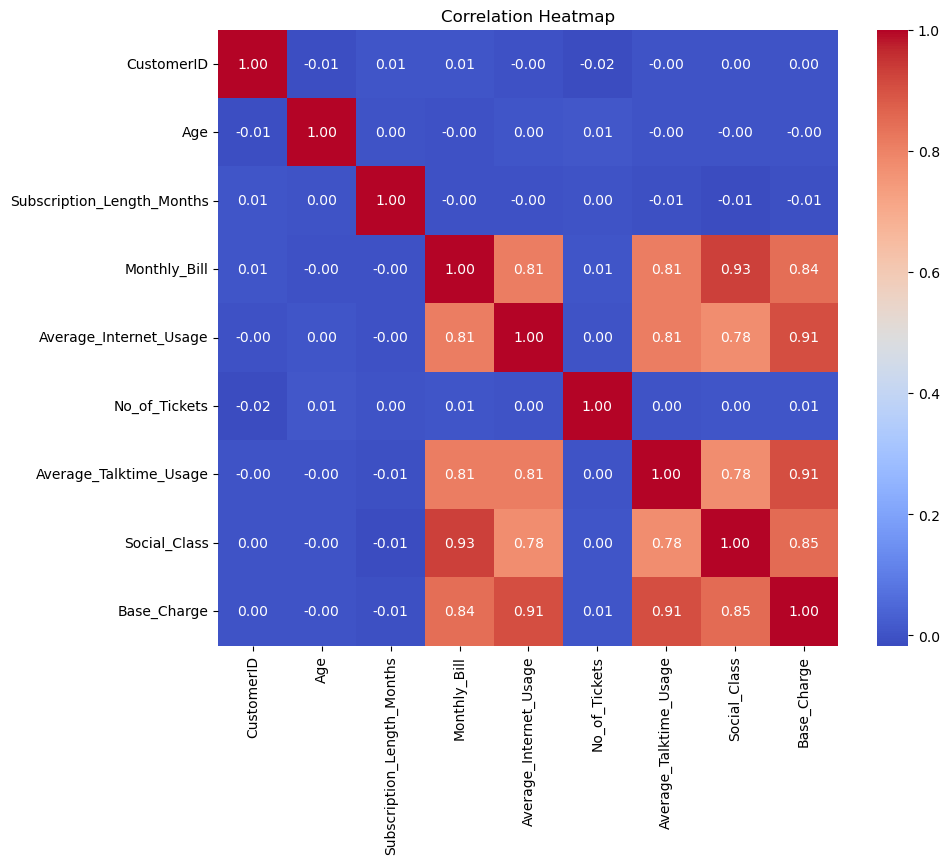

In [8]:
# Correlation heatmap for numerical features
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


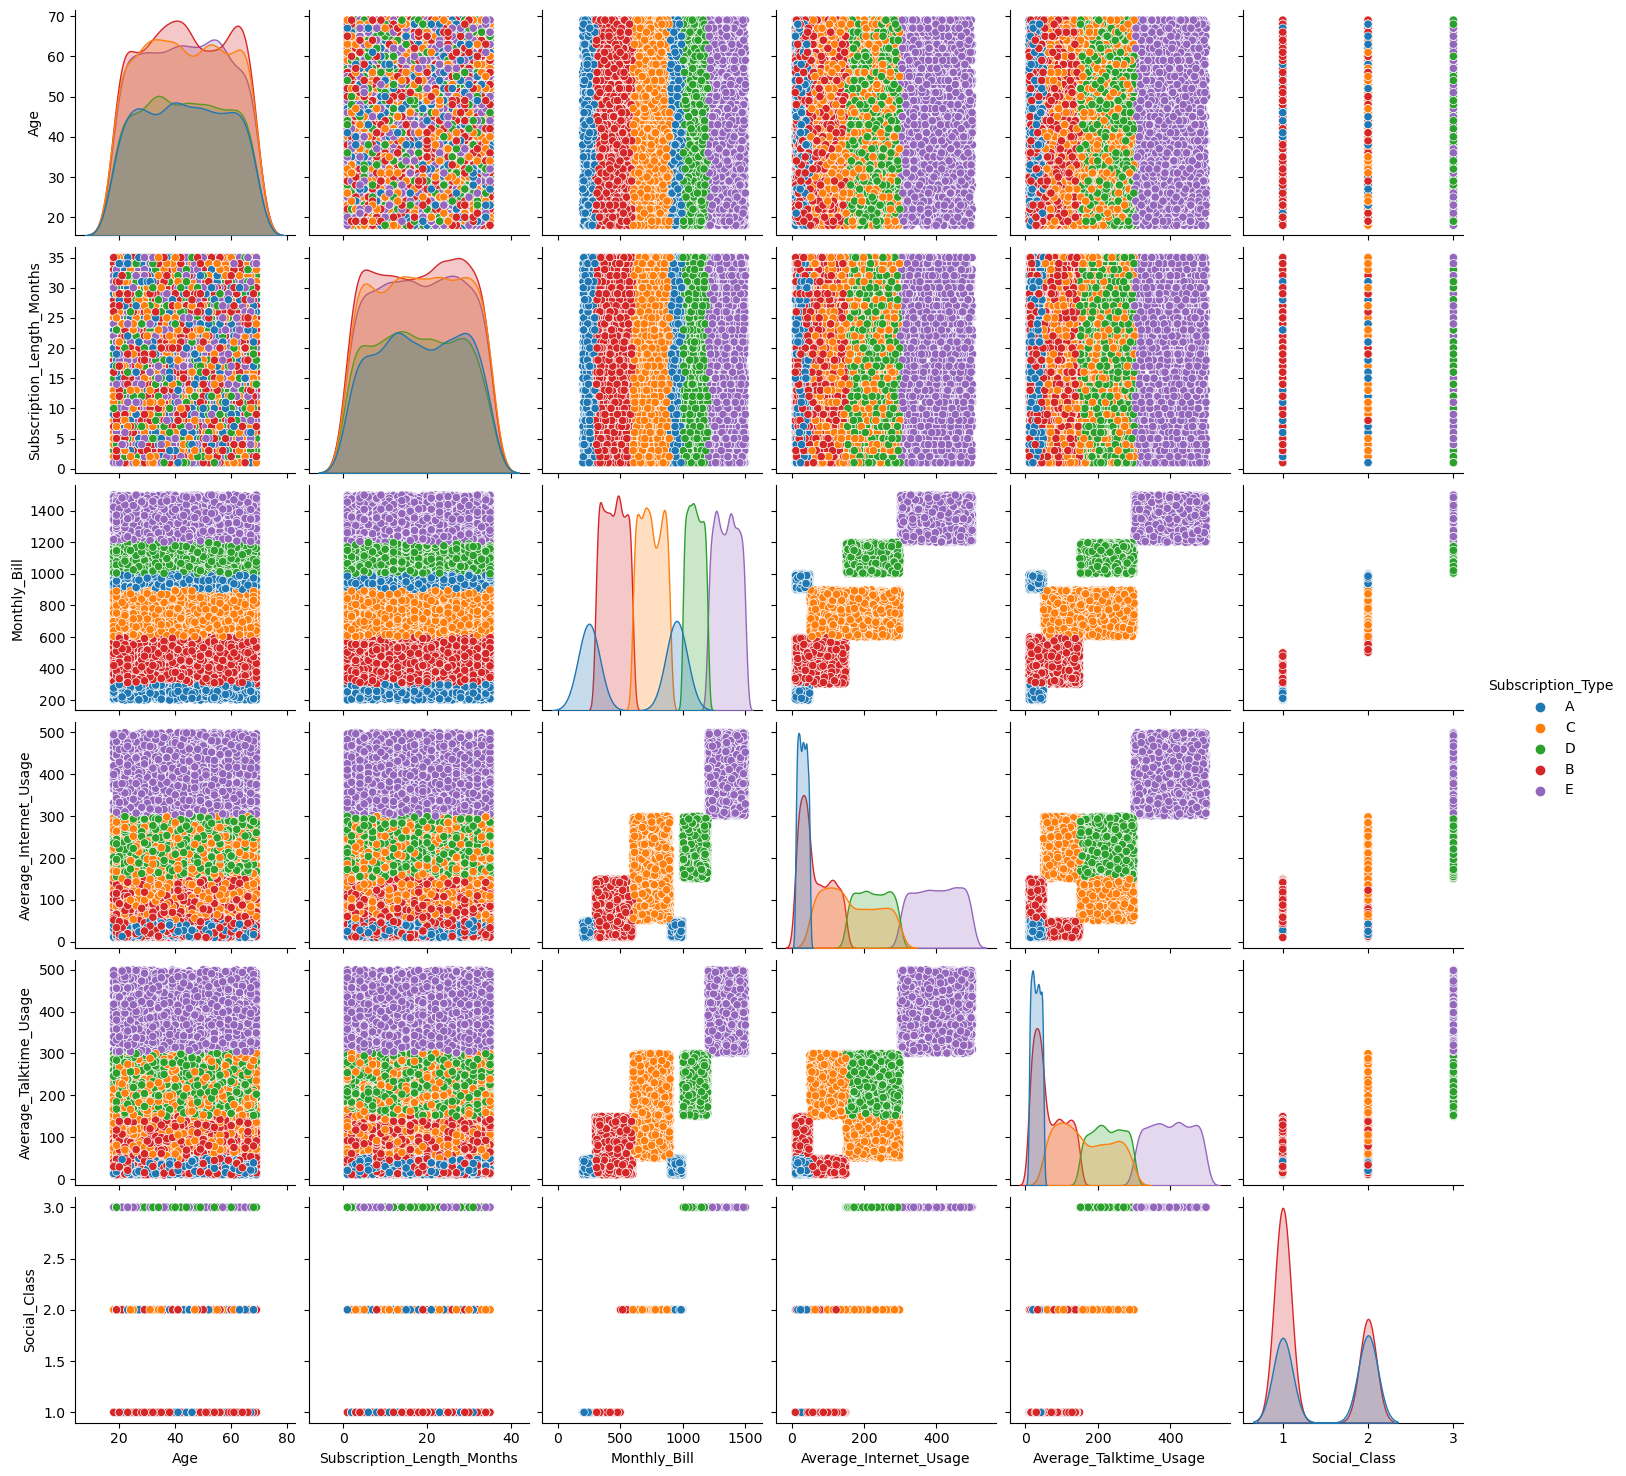

In [9]:
# Pairplot to visualize relationships between features
sns.pairplot(df[numerical_features + ['Subscription_Type']], hue='Subscription_Type')
plt.show()

# K-Means Clustering

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
df.head()

CustomerID        Name  Age  Gender  Location  Subscription_Length_Months  \
0           1  Customer_1   56    Male     Urban                          29   
1           2  Customer_2   69  Female     Rural                          24   
2           3  Customer_3   46  Female  Suburban                          14   
3           4  Customer_4   32  Female     Urban                          14   
4           5  Customer_5   60    Male  Suburban                          25   

   Monthly_Bill  Average_Internet_Usage  No_of_Tickets  \
0    286.658992               24.945633              0   
1    706.286532              241.090001              1   
2   1070.546459              279.855149              0   
3    338.363834               40.517955              2   
4    835.573690              122.903374              0   

   Average_Talktime_Usage  Social_Class Subscription_Type  Base_Charge  
0               23.316484             1                 A          100  
1               97.662416             2                 C          300  
2              154.816437             3                 D          400  
3              125.948657             1                 B          200  
4              289.171509             2                 C          300

In [11]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the Subscription_Type column
df['Subscription_Type_Encoded'] = label_encoder.fit_transform(df['Subscription_Type'])

# Display the first few rows to verify the encoding
print(df.head())

# Optionally, you can check the classes and their corresponding labels
print("Classes and their corresponding labels:")
for i, class_label in enumerate(label_encoder.classes_):
    print(f"{class_label}: {i}")



   CustomerID        Name  Age  Gender  Location  Subscription_Length_Months  \
0           1  Customer_1   56    Male     Urban                          29   
1           2  Customer_2   69  Female     Rural                          24   
2           3  Customer_3   46  Female  Suburban                          14   
3           4  Customer_4   32  Female     Urban                          14   
4           5  Customer_5   60    Male  Suburban                          25   

   Monthly_Bill  Average_Internet_Usage  No_of_Tickets  \
0    286.658992               24.945633              0   
1    706.286532              241.090001              1   
2   1070.546459              279.855149              0   
3    338.363834               40.517955              2   
4    835.573690              122.903374              0   

   Average_Talktime_Usage  Social_Class Subscription_Type  Base_Charge  \
0               23.316484             1                 A          100   
1               97.662

In [12]:
df.head(5)

CustomerID        Name  Age  Gender  Location  Subscription_Length_Months  \
0           1  Customer_1   56    Male     Urban                          29   
1           2  Customer_2   69  Female     Rural                          24   
2           3  Customer_3   46  Female  Suburban                          14   
3           4  Customer_4   32  Female     Urban                          14   
4           5  Customer_5   60    Male  Suburban                          25   

   Monthly_Bill  Average_Internet_Usage  No_of_Tickets  \
0    286.658992               24.945633              0   
1    706.286532              241.090001              1   
2   1070.546459              279.855149              0   
3    338.363834               40.517955              2   
4    835.573690              122.903374              0   

   Average_Talktime_Usage  Social_Class Subscription_Type  Base_Charge  \
0               23.316484             1                 A          100   
1               97.662416             2                 C          300   
2              154.816437             3                 D          400   
3              125.948657             1                 B          200   
4              289.171509             2                 C          300   

   Subscription_Type_Encoded  
0                          0  
1                          2  
2                          3  
3                          1  
4                          2

/Users/shubhhammm25/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/shubhhammm25/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/shubhhammm25/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/shubhhammm25/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warning

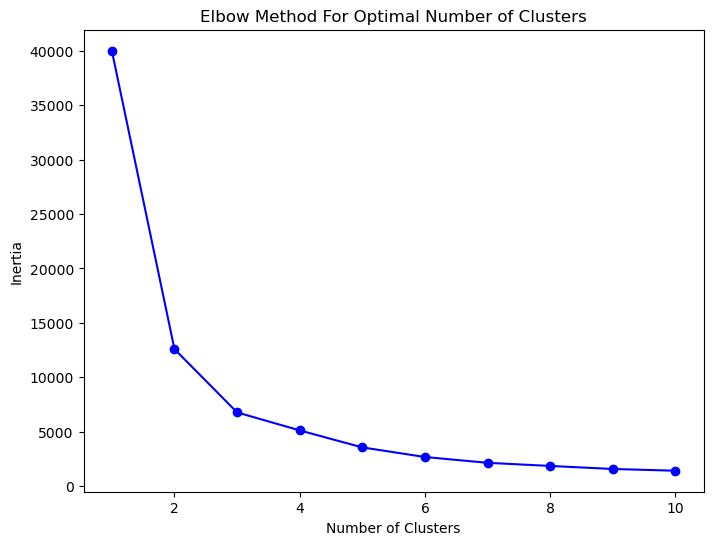

In [13]:
from sklearn.preprocessing import StandardScaler

# Select the features for clustering
#features = df[['Average_Internet_Usage', 'Average_Talktime_Usage', 'Monthly_Bill', 
 #              'Subscription_Length_Months', 'Social_Class']]
features = df[['Average_Internet_Usage', 'Average_Talktime_Usage', 'Monthly_Bill', 
               'Subscription_Type_Encoded']]
# Initialize the scaler
scaler = StandardScaler()

# Scale the features
scaled_features = scaler.fit_transform(features)

# Convert scaled features back to a DataFrame for ease of use
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)

# Use the Elbow method to determine the optimal number of clusters
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()


In [14]:
from sklearn.cluster import KMeans

# Apply K-means clustering with 7 clusters
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans.fit(scaled_df)

# Add the cluster labels to the original dataframe
df['Cluster'] = kmeans.labels_

# Display the first few rows to check the clusters
print(df.head())

# Optionally, visualize the clusters using a pairplot (if you have a few features)
#sns.pairplot(df, hue='Cluster', vars=['Average_Internet_Usage', 'Average_Talktime_Usage', 'Monthly_Bill'])
#plt.show()


# Assuming 'df' is your DataFrame with clusters
df.to_excel('/Users/shubhhammm25/Desktop/Custom Retain//synthetic_customer_churn_with_clusters.xlsx', index=False)


/Users/shubhhammm25/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   CustomerID        Name  Age  Gender  Location  Subscription_Length_Months  \
0           1  Customer_1   56    Male     Urban                          29   
1           2  Customer_2   69  Female     Rural                          24   
2           3  Customer_3   46  Female  Suburban                          14   
3           4  Customer_4   32  Female     Urban                          14   
4           5  Customer_5   60    Male  Suburban                          25   

   Monthly_Bill  Average_Internet_Usage  No_of_Tickets  \
0    286.658992               24.945633              0   
1    706.286532              241.090001              1   
2   1070.546459              279.855149              0   
3    338.363834               40.517955              2   
4    835.573690              122.903374              0   

   Average_Talktime_Usage  Social_Class Subscription_Type  Base_Charge  \
0               23.316484             1                 A          100   
1               97.662

In [15]:
cluster_counts=df["Cluster"].value_counts().reset_index()

In [16]:
cluster_counts

index  Cluster
0      4     2232
1      0     1567
2      7     1208
3      1     1194
4      2     1154
5      6     1127
6      3      770
7      5      748

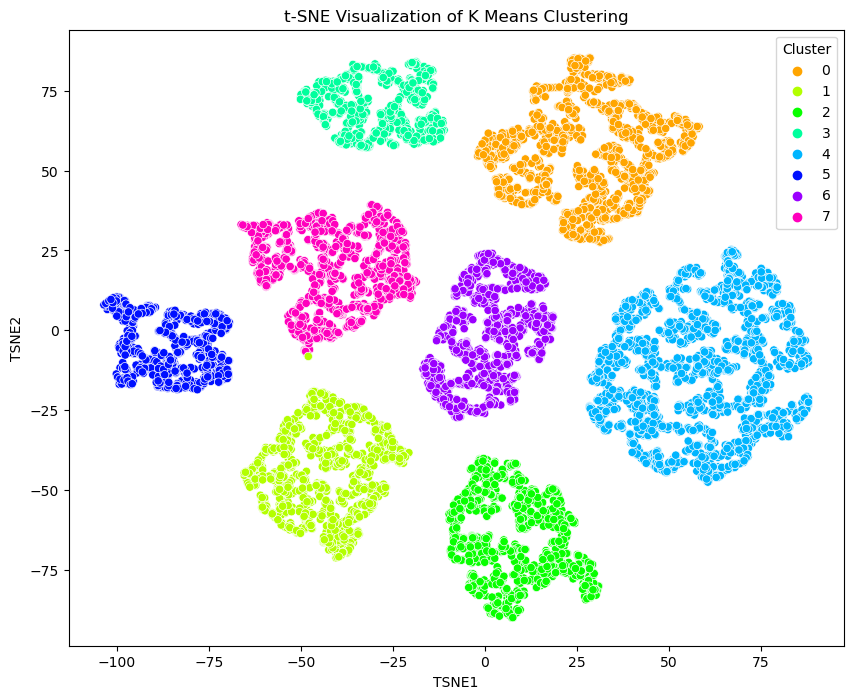

In [90]:
from sklearn.manifold import TSNE

# Perform t-SNE on the scaled features
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(scaled_df)

# Create a DataFrame with the t-SNE results
df_tsne = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])
df_tsne['Cluster'] = df['Cluster']  # Add the cluster labels

# Plot the t-SNE results
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='TSNE1', y='TSNE2',
    hue='Cluster',
    palette=sns.color_palette('hsv', len(df['Cluster'].unique())),
    data=df_tsne,
    legend='full'
)
plt.title('t-SNE Visualization of K Means Clustering')
plt.show()


In [21]:
# Assuming df_tsne has columns ['TSNE_1', 'TSNE_2']
# and df has the rest of the data

# Merge the DataFrames
df_combined = pd.concat([df, df_tsne], axis=1)

# Display the first few rows to ensure the merge was successful
(df_combined.head())


CustomerID        Name  Age  Gender  Location  Subscription_Length_Months  \
0           1  Customer_1   56    Male     Urban                          29   
1           2  Customer_2   69  Female     Rural                          24   
2           3  Customer_3   46  Female  Suburban                          14   
3           4  Customer_4   32  Female     Urban                          14   
4           5  Customer_5   60    Male  Suburban                          25   

   Monthly_Bill  Average_Internet_Usage  No_of_Tickets  \
0    286.658992               24.945633              0   
1    706.286532              241.090001              1   
2   1070.546459              279.855149              0   
3    338.363834               40.517955              2   
4    835.573690              122.903374              0   

   Average_Talktime_Usage  Social_Class Subscription_Type  Base_Charge  \
0               23.316484             1                 A          100   
1               97.662416             2                 C          300   
2              154.816437             3                 D          400   
3              125.948657             1                 B          200   
4              289.171509             2                 C          300   

   Subscription_Type_Encoded  Cluster      TSNE1      TSNE2  Cluster  
0                          0        5 -99.320076   5.867683        5  
1                          2        6   7.592963   4.827575        6  
2                          3        0   4.073036  56.082111        0  
3                          1        1 -42.731308 -64.141457        1  
4                          2        2  25.427797 -74.847267        2

In [22]:
# Remove duplicate columns
df_combined = df_combined.loc[:, ~df_combined.columns.duplicated()]


In [23]:
df_combined.head()

CustomerID        Name  Age  Gender  Location  Subscription_Length_Months  \
0           1  Customer_1   56    Male     Urban                          29   
1           2  Customer_2   69  Female     Rural                          24   
2           3  Customer_3   46  Female  Suburban                          14   
3           4  Customer_4   32  Female     Urban                          14   
4           5  Customer_5   60    Male  Suburban                          25   

   Monthly_Bill  Average_Internet_Usage  No_of_Tickets  \
0    286.658992               24.945633              0   
1    706.286532              241.090001              1   
2   1070.546459              279.855149              0   
3    338.363834               40.517955              2   
4    835.573690              122.903374              0   

   Average_Talktime_Usage  Social_Class Subscription_Type  Base_Charge  \
0               23.316484             1                 A          100   
1               97.662416             2                 C          300   
2              154.816437             3                 D          400   
3              125.948657             1                 B          200   
4              289.171509             2                 C          300   

   Subscription_Type_Encoded  Cluster      TSNE1      TSNE2  
0                          0        5 -99.320076   5.867683  
1                          2        6   7.592963   4.827575  
2                          3        0   4.073036  56.082111  
3                          1        1 -42.731308 -64.141457  
4                          2        2  25.427797 -74.847267

In [24]:
df_combined.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Average_Internet_Usage',
       'No_of_Tickets', 'Average_Talktime_Usage', 'Social_Class',
       'Subscription_Type', 'Base_Charge', 'Subscription_Type_Encoded',
       'Cluster', 'TSNE1', 'TSNE2'],
      dtype='object')

In [ ]:
df_c1=df[df["Cluster"]==0]
df_c1.describe()
#Cluster 0 defines that Average internet usage and Talktime usage are medium

In [ ]:
df_c1=df[df["Cluster"]==1]
df_c1.describe()
#Cluster 1 defines that Average internet usage is less and Talktime usage is medium

In [ ]:
df_c1=df[df["Cluster"]==2]
df_c1.describe()
#Cluster 2 defines that Average internet usage is medium and Talktime usage is high

In [ ]:
df_c1=df[df["Cluster"]==3]
df_c1.describe()
#Cluster 3 defines that Average internet usage is low and Talktime usage is low

In [ ]:
df_c1=df[df["Cluster"]==4]
df_c1.describe()
#Cluster 4 defines that Average internet usage is very high and Talktime usage is very high

In [ ]:
df_c1=df[df["Cluster"]==5]
df_c1.describe()
#Cluster 5 defines that Average internet usage is low and Talktime usage is low

In [ ]:
df_c1=df[df["Cluster"]==6]
df_c1.describe()
#Cluster 6 defines that Average internet usage is high and Talktime usage is low

In [ ]:
df_c1=df[df["Cluster"]==7]
df_c1.describe()
#Cluster 7 defines that Average internet usage is medium and Talktime usage is low

In [71]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Extract the relevant features from the DataFrame
features = df_combined[['Average_Internet_Usage', 'Average_Talktime_Usage', 'Monthly_Bill', 
                        'Subscription_Type_Encoded']]
print(f"K-means Clustering:")
# Calculate the Silhouette Score
silhouette_avg = silhouette_score(features, df_combined['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

# Calculate the WCSS for the current clustering
kmeans = KMeans(n_clusters=df_combined['Cluster'].nunique(), random_state=42)
kmeans.fit(features)
wcss = kmeans.inertia_
print(f"WCSS (Within-Cluster Sum of Squares): {wcss}")

from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

# Calculate Davies-Bouldin Index and Calinski-Harabasz Index for K-means
db_index_kmeans = davies_bouldin_score(scaled_features, df['Cluster'])
ch_index_kmeans = calinski_harabasz_score(scaled_features, df['Cluster'])
print(f"Davies-Bouldin Index: {db_index_kmeans}")
print(f"Calinski-Harabasz Index: {ch_index_kmeans}")


K-means Clustering:
Silhouette Score: 0.48382276160804505
WCSS (Within-Cluster Sum of Squares): 74081293.0818927
Davies-Bouldin Index: 0.6038789926443952
Calinski-Harabasz Index: 29363.71192848966


/Users/shubhhammm25/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# HEIRARCHICAL CLUSTERING

In [28]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

# Assuming df is your DataFrame

# Step 1: Preprocess the data (Encoding, Scaling)
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the Subscription_Type column
df['Subscription_Type_Encoded'] = label_encoder.fit_transform(df['Subscription_Type'])

# Select the features for hierarchical clustering
features = df[['Average_Internet_Usage', 'Average_Talktime_Usage', 'Monthly_Bill', 
               'Subscription_Type_Encoded']]

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


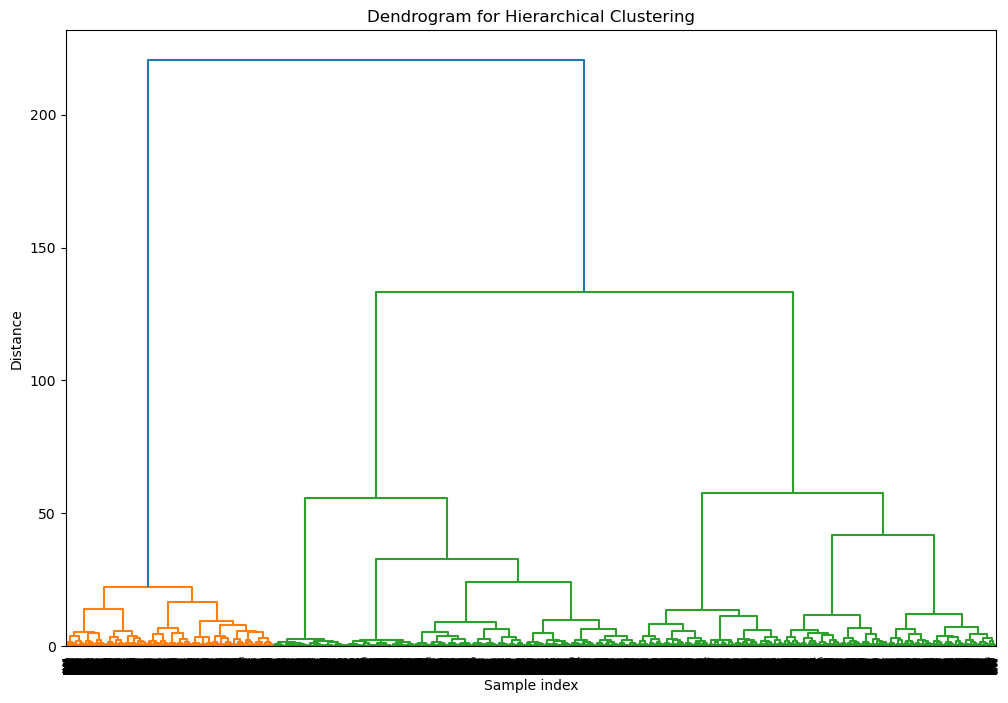

In [29]:
# Step 2: Perform Hierarchical Clustering

# Create a linkage matrix
Z = linkage(scaled_features, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(Z)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()


In [52]:
# Apply Agglomerative Clustering with a chosen number of clusters (e.g., 8)
hc = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='ward')
df['Cluster_HC'] = hc.fit_predict(scaled_features)

# Display the first few rows to check the clusters
print(df.head())

/Users/shubhhammm25/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


   CustomerID        Name  Age  Gender  Location  Subscription_Length_Months  \
0           1  Customer_1   56    Male     Urban                          29   
1           2  Customer_2   69  Female     Rural                          24   
2           3  Customer_3   46  Female  Suburban                          14   
3           4  Customer_4   32  Female     Urban                          14   
4           5  Customer_5   60    Male  Suburban                          25   

   Monthly_Bill  Average_Internet_Usage  No_of_Tickets  \
0    286.658992               24.945633              0   
1    706.286532              241.090001              1   
2   1070.546459              279.855149              0   
3    338.363834               40.517955              2   
4    835.573690              122.903374              0   

   Average_Talktime_Usage  Social_Class Subscription_Type  Base_Charge  \
0               23.316484             1                 A          100   
1               97.662

In [54]:
# Count the number of data points in each cluster for Hierarchical Clustering
cluster_counts_hc = df["Cluster_HC"].value_counts().reset_index()
cluster_counts_hc.columns = ['Cluster_HC', 'Count']  # Rename columns for clarity
print(cluster_counts_hc)


   Cluster_HC  Count
0           0   2232
1           1   1567
2           3   1210
3           7   1192
4           2   1156
5           5   1125
6           4    770
7           6    748


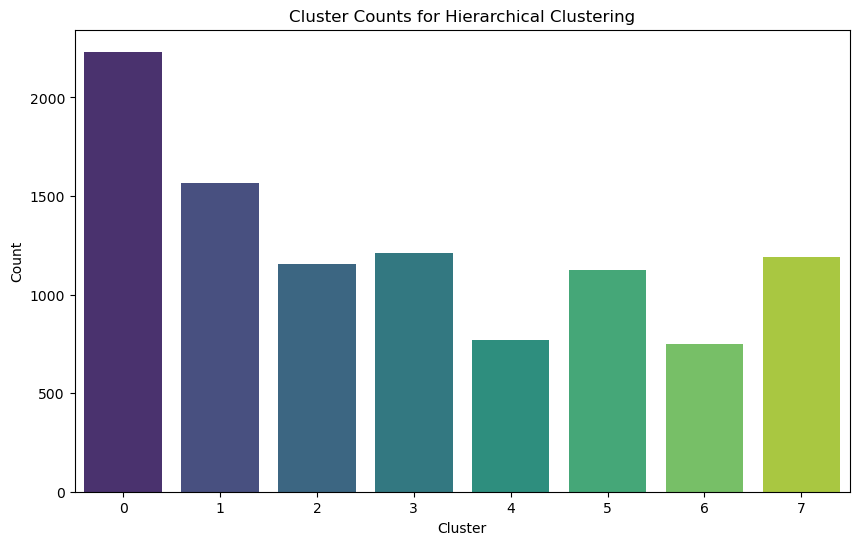

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar chart for Hierarchical Clustering
plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster_HC', y='Count', data=cluster_counts_hc, palette='viridis')
plt.title('Cluster Counts for Hierarchical Clustering')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()


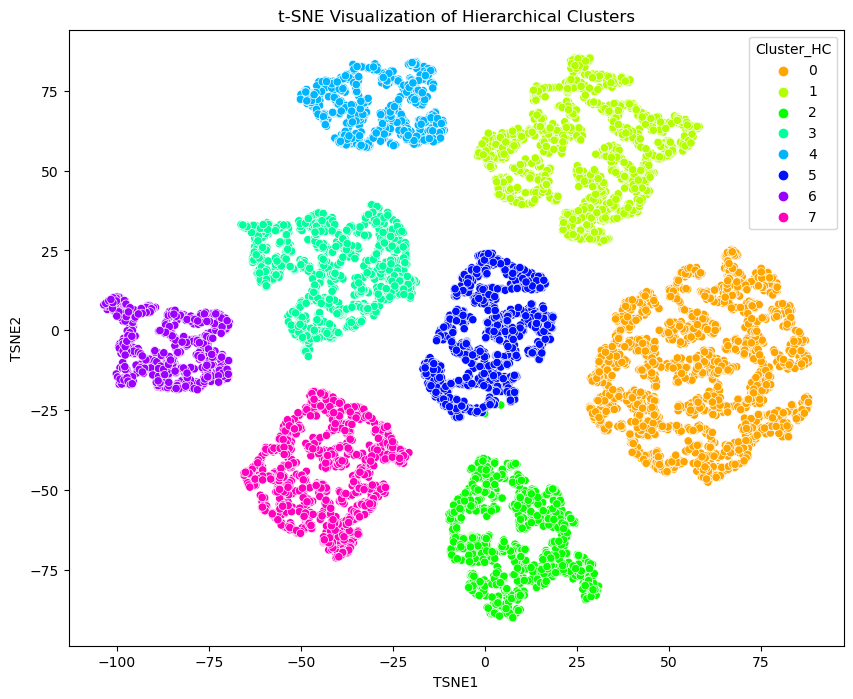

In [32]:
#Visualising the t-SNE results with Hierarchical Clusters
from sklearn.manifold import TSNE

# Perform t-SNE on the scaled features
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(scaled_features)

# Create a DataFrame with the t-SNE results
df_tsne_hc = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])
df_tsne_hc['Cluster_HC'] = df['Cluster_HC']  # Add the hierarchical cluster labels

# Plot the t-SNE results
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='TSNE1', y='TSNE2',
    hue='Cluster_HC',
    palette=sns.color_palette('hsv', len(df['Cluster_HC'].unique())),
    data=df_tsne_hc,
    legend='full'
)
plt.title('t-SNE Visualization of Hierarchical Clusters')
plt.show()

In [72]:
# Calculate the Silhouette Score for hierarchical clustering
silhouette_avg_hc = silhouette_score(scaled_features, df['Cluster_HC'])
print(f"Hierarchical Clustering:")
print(f"Silhouette Score for Hierarchical Clustering: {silhouette_avg_hc}")

# Calculate the mean of each cluster
cluster_centers = df.groupby('Cluster_HC')[['Average_Internet_Usage', 'Average_Talktime_Usage', 'Monthly_Bill', 'Subscription_Type_Encoded']].mean()

# Compute WCSS-like score
wcss_hc = 0
for i in cluster_centers.index:
    cluster_points = scaled_features[df['Cluster_HC'] == i]  # Points in cluster i
    center = cluster_centers.loc[i].values  # Center of cluster i
    wcss_hc += np.sum((cluster_points - center) ** 2)

print(f"WCSS-like Score for Hierarchical Clustering: {wcss_hc}")
# Calculate Davies-Bouldin Index and Calinski-Harabasz Index for Hierarchical Clustering
db_index_hc = davies_bouldin_score(scaled_features, df['Cluster_HC'])
ch_index_hc = calinski_harabasz_score(scaled_features, df['Cluster_HC'])

print(f"Davies-Bouldin Index: {db_index_hc}")
print(f"Calinski-Harabasz Index: {ch_index_hc}")



Hierarchical Clustering:
Silhouette Score for Hierarchical Clustering: 0.5944849731406201
WCSS-like Score for Hierarchical Clustering: 9482316672.977531
Davies-Bouldin Index: 0.6040511600306995
Calinski-Harabasz Index: 29360.24639826589


# DBSCAN CLUSTERING

In [38]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score

# Assuming df is your DataFrame

# Step 1: Preprocess the data (Encoding, Scaling)
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the Subscription_Type column
df['Subscription_Type_Encoded'] = label_encoder.fit_transform(df['Subscription_Type'])

# Select the features for DBSCAN clustering
features = df[['Average_Internet_Usage', 'Average_Talktime_Usage', 'Monthly_Bill', 
               'Subscription_Type_Encoded']]

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [49]:
# Step 2: Perform DBSCAN Clustering

# Apply DBSCAN with chosen parameters
dbscan = DBSCAN(eps=0.5, min_samples=8, metric='euclidean')
df['Cluster_DBSCAN'] = dbscan.fit_predict(scaled_features)

# Display the first few rows to check the clusters
print(df.head())

   CustomerID        Name  Age  Gender  Location  Subscription_Length_Months  \
0           1  Customer_1   56    Male     Urban                          29   
1           2  Customer_2   69  Female     Rural                          24   
2           3  Customer_3   46  Female  Suburban                          14   
3           4  Customer_4   32  Female     Urban                          14   
4           5  Customer_5   60    Male  Suburban                          25   

   Monthly_Bill  Average_Internet_Usage  No_of_Tickets  \
0    286.658992               24.945633              0   
1    706.286532              241.090001              1   
2   1070.546459              279.855149              0   
3    338.363834               40.517955              2   
4    835.573690              122.903374              0   

   Average_Talktime_Usage  Social_Class Subscription_Type  Base_Charge  \
0               23.316484             1                 A          100   
1               97.662

In [56]:
# Count the number of data points in each cluster for DBSCAN
cluster_counts_dbscan = df["Cluster_DBSCAN"].value_counts().reset_index()
cluster_counts_dbscan.columns = ['Cluster_DBSCAN', 'Count']  # Rename columns for clarity
print(cluster_counts_dbscan)


   Cluster_DBSCAN  Count
0               3   2402
1               1   2281
2               4   2232
3               2   1567
4               5    770
5               0    748


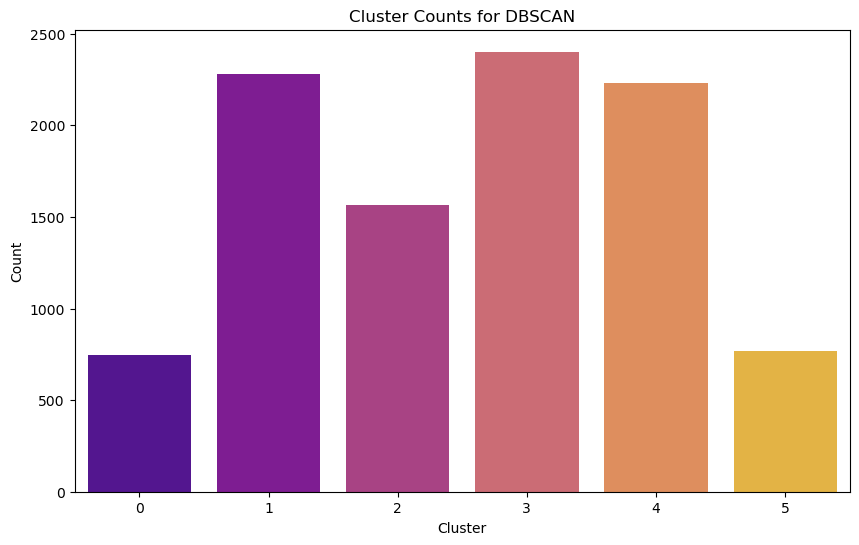

In [57]:
# Bar chart for DBSCAN
plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster_DBSCAN', y='Count', data=cluster_counts_dbscan, palette='plasma')
plt.title('Cluster Counts for DBSCAN')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()


In [73]:
# Step 3: Evaluate Clustering with Silhouette Score (if applicable)
# Silhouette Score is not ideal for DBSCAN since it labels some points as noise (-1),
# but you can still calculate it for the clustered points.

# Filter out noise points for silhouette score calculation
filtered_df = df[df['Cluster_DBSCAN'] != -1]
filtered_scaled_features = scaled_features[df['Cluster_DBSCAN'] != -1]
silhouette_avg_dbscan = silhouette_score(filtered_scaled_features, filtered_df['Cluster_DBSCAN'])

print(f"DBSCAN Clustering:")
print(f"Silhouette Score for DBSCAN Clustering: {silhouette_avg_dbscan}")

# Compute WCSS-like score for DBSCAN
cluster_centers = filtered_df.groupby('Cluster_DBSCAN')[['Average_Internet_Usage', 'Average_Talktime_Usage', 'Monthly_Bill', 'Subscription_Type_Encoded']].mean()

wcss_dbscan = 0
for i in cluster_centers.index:
    cluster_points = scaled_features[filtered_df['Cluster_DBSCAN'] == i]  # Points in cluster i
    center = cluster_centers.loc[i].values  # Center of cluster i
    wcss_dbscan += np.sum((cluster_points - center) ** 2)

print(f"WCSS-like Score for DBSCAN Clustering: {wcss_dbscan}")
# Filter out noise points for index calculation
filtered_scaled_features_dbscan = scaled_features[df['Cluster_DBSCAN'] != -1]
filtered_clusters_dbscan = df['Cluster_DBSCAN'][df['Cluster_DBSCAN'] != -1]

# Calculate Davies-Bouldin Index and Calinski-Harabasz Index for DBSCAN
db_index_dbscan = davies_bouldin_score(filtered_scaled_features_dbscan, filtered_clusters_dbscan)
ch_index_dbscan = calinski_harabasz_score(filtered_scaled_features_dbscan, filtered_clusters_dbscan)

print(f"Davies-Bouldin Index: {db_index_dbscan}")
print(f"Calinski-Harabasz Index: {ch_index_dbscan}")


DBSCAN Clustering:
Silhouette Score for DBSCAN Clustering: 0.5457125692451841
WCSS-like Score for DBSCAN Clustering: 9458584587.767546
Davies-Bouldin Index: 0.6767121457191719
Calinski-Harabasz Index: 24442.358511668423


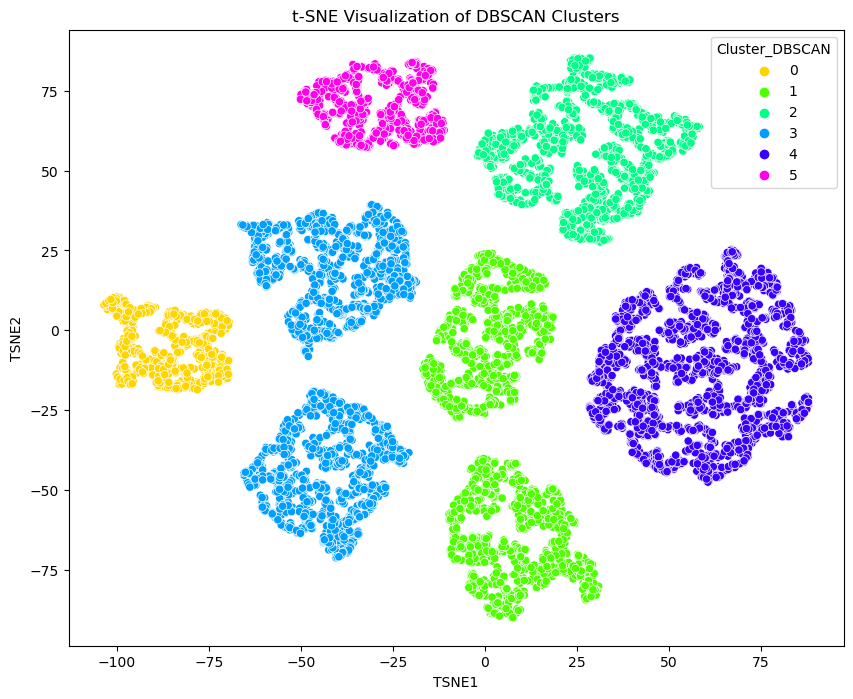

In [51]:
#Visualising the t-SNE results with DBSCAN Clusters
from sklearn.manifold import TSNE

# Perform t-SNE on the scaled features
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(scaled_features)

# Create a DataFrame with the t-SNE results
df_tsne_dbscan = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])
df_tsne_dbscan['Cluster_DBSCAN'] = df['Cluster_DBSCAN']  # Add the DBSCAN cluster labels

# Plot the t-SNE results
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='TSNE1', y='TSNE2',
    hue='Cluster_DBSCAN',
    palette=sns.color_palette('hsv', len(df['Cluster_DBSCAN'].unique())),
    data=df_tsne_dbscan,
    legend='full'
)
plt.title('t-SNE Visualization of DBSCAN Clusters')
plt.show()

# Gaussian Mixture Models (GMM)

In [86]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# Assuming df_combined is your DataFrame and scaled_features are the features after scaling

# Initialize and fit the Gaussian Mixture Model
gmm = GaussianMixture(n_components=8, random_state=42)
gmm.fit(scaled_features)
# Predict the clusters
df['Cluster_GMM'] = gmm.predict(scaled_features)

NameError: name 'b' is not defined

In [87]:
# Count the number of data points in each cluster for GMM
cluster_counts_gmm = df["Cluster_GMM"].value_counts().reset_index()
cluster_counts_gmm.columns = ['Cluster_GMM', 'Count']  # Rename columns for clarity
print(cluster_counts_gmm)


   Cluster_GMM  Count
0            0   2402
1            2   1567
2            3   1154
3            7   1150
4            5   1127
5            1   1082
6            4    770
7            6    748


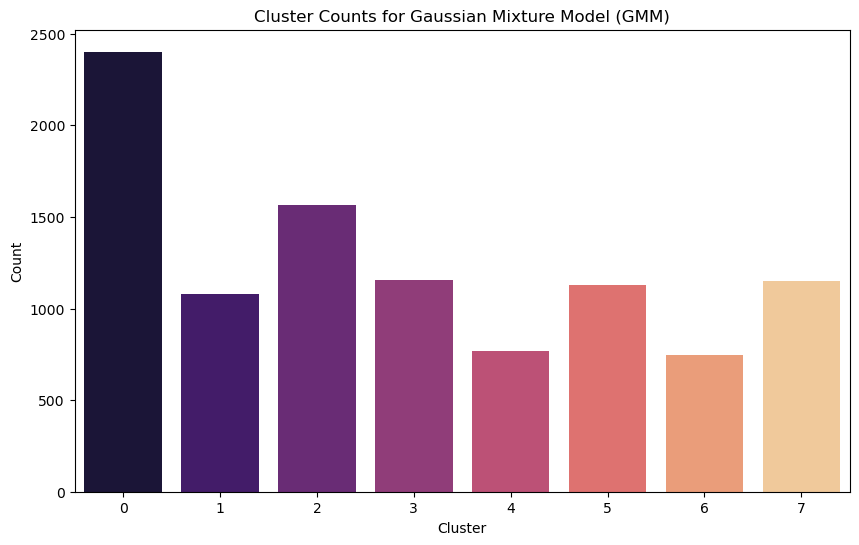

In [88]:
# Bar chart for GMM Clustering
plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster_GMM', y='Count', data=cluster_counts_gmm, palette='magma')
plt.title('Cluster Counts for Gaussian Mixture Model (GMM)')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()


In [89]:
# Calculate the Silhouette Score for GMM
silhouette_avg_gmm = silhouette_score(scaled_features, df['Cluster_GMM'])
print(f"Gaussian Mixture Model (GMM) Clustering:")
print(f"Silhouette Score for GMM Clustering: {silhouette_avg_gmm}")
# Step 4: Calculate WCSS-like score for GMM
cluster_centers_gmm = pd.DataFrame(gmm.means_, columns=['Average_Internet_Usage', 'Average_Talktime_Usage', 'Monthly_Bill', 'Subscription_Type_Encoded'])

# Compute WCSS-like score for GMM
wcss_gmm = 0
for i in range(gmm.n_components):
    cluster_points = scaled_features[df['Cluster_GMM'] == i]  # Points in cluster i
    center = cluster_centers_gmm.loc[i].values  # Center of cluster i
    wcss_gmm += np.sum((cluster_points - center) ** 2)

print(f"WCSS-like Score for GMM Clustering: {wcss_gmm}")
# Calculate Davies-Bouldin Index and Calinski-Harabasz Index for GMM
db_index_gmm = davies_bouldin_score(scaled_features, df['Cluster_GMM'])
ch_index_gmm = calinski_harabasz_score(scaled_features, df['Cluster_GMM'])


print(f"Davies-Bouldin Index: {db_index_gmm}")
print(f"Calinski-Harabasz Index: {ch_index_gmm}")


Gaussian Mixture Model (GMM) Clustering:
Silhouette Score for GMM Clustering: 0.5167314623173986
WCSS-like Score for GMM Clustering: 1875.60126310108
Davies-Bouldin Index: 0.7818140811507615
Calinski-Harabasz Index: 29020.197447361435


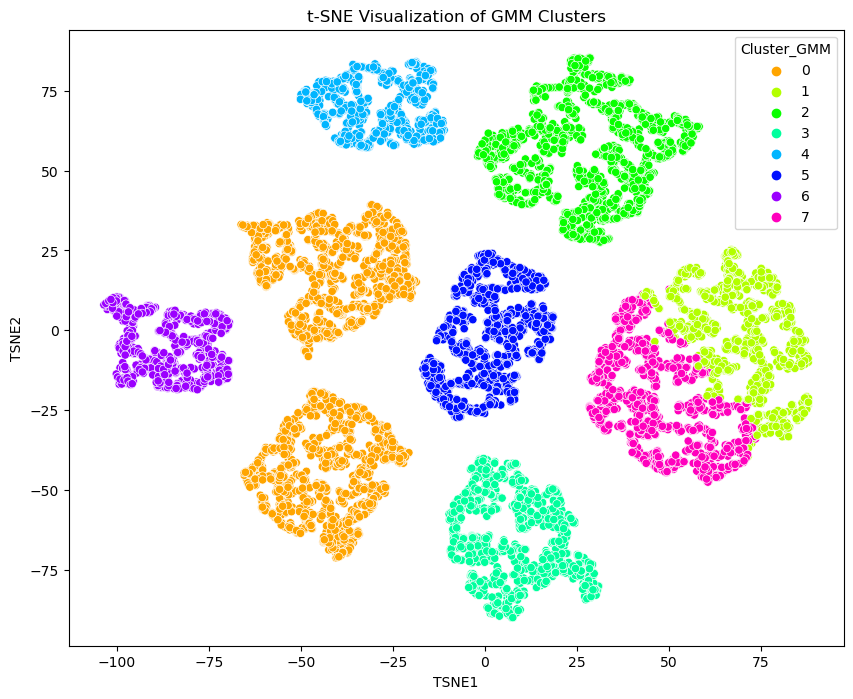

In [85]:
#Visualising the t-SNE results with GMM Clusters
from sklearn.manifold import TSNE

# Perform t-SNE on the scaled features
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(scaled_features)

# Create a DataFrame with the t-SNE results
df_tsne_gmm = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])
df_tsne_gmm['Cluster_GMM'] = df['Cluster_GMM']  # Add the GMM cluster labels

# Plot the t-SNE results
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='TSNE1', y='TSNE2',
    hue='Cluster_GMM',
    palette=sns.color_palette('hsv', len(df['Cluster_GMM'].unique())),
    data=df_tsne_gmm,
    legend='full'
)
plt.title('t-SNE Visualization of GMM Clusters')
plt.show()

# Fuzzy-C Clustering

In [60]:
pip install scikit-fuzzy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 5.1 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [62]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import silhouette_score

# Assuming df is your DataFrame

# Step 1: Preprocess the data (Encoding, Scaling)
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the Subscription_Type column
df['Subscription_Type_Encoded'] = label_encoder.fit_transform(df['Subscription_Type'])

# Select the features for Fuzzy C-Means clustering
features = df[['Average_Internet_Usage', 'Average_Talktime_Usage', 'Monthly_Bill', 
               'Subscription_Type_Encoded']]

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [63]:
# Step 2: Perform Fuzzy C-Means Clustering
# Define the number of clusters
n_clusters = 8

# Perform Fuzzy C-Means
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    scaled_features.T, n_clusters, 2, error=0.005, maxiter=1000, init=None, seed=42)

# Assign each data point to the cluster with the highest membership
cluster_labels = np.argmax(u, axis=0)
df['Cluster_FCM'] = cluster_labels


In [75]:
# Step 3: Calculate the Silhouette Score for FCM
# For FCM, the silhouette score isn't as straightforward because of the membership levels.
# However, we can calculate it based on the maximum membership cluster assignments.

print(f"Fuzzy C-Means (FCM) Clustering:")
silhouette_avg_fcm = silhouette_score(scaled_features, df['Cluster_FCM'])
print(f"Silhouette Score for FCM Clustering: {silhouette_avg_fcm}")

# Step 4: Calculate WCSS-like score for FCM
# The cluster centers are already calculated by FCM in 'cntr'
cluster_centers_fcm = pd.DataFrame(cntr, columns=['Average_Internet_Usage', 'Average_Talktime_Usage', 'Monthly_Bill', 'Subscription_Type_Encoded'])

# Compute WCSS-like score for FCM
wcss_fcm = 0
for i in range(n_clusters):
    cluster_points = scaled_features[df['Cluster_FCM'] == i]  # Points in cluster i
    center = cluster_centers_fcm.loc[i].values  # Center of cluster i
    wcss_fcm += np.sum((cluster_points - center) ** 2)

print(f"WCSS-like Score for FCM Clustering: {wcss_fcm}")
# Calculate Davies-Bouldin Index and Calinski-Harabasz Index for FCM
db_index_fcm = davies_bouldin_score(scaled_features, df['Cluster_FCM'])
ch_index_fcm = calinski_harabasz_score(scaled_features, df['Cluster_FCM'])

print(f"Davies-Bouldin Index: {db_index_fcm}")
print(f"Calinski-Harabasz Index: {ch_index_fcm}")


Fuzzy C-Means (FCM) Clustering:
Silhouette Score for FCM Clustering: 0.51576185079824
WCSS-like Score for FCM Clustering: 1884.844121251289
Davies-Bouldin Index: 0.7795827022183635
Calinski-Harabasz Index: 29006.883489464068


In [65]:
# Step 5: Calculate cluster counts
cluster_counts_fcm = df["Cluster_FCM"].value_counts().reset_index()
cluster_counts_fcm.columns = ['Cluster_FCM', 'Count']  # Rename columns for clarity
print(cluster_counts_fcm)

   Cluster_FCM  Count
0            5   2402
1            3   1567
2            1   1154
3            0   1133
4            2   1127
5            4   1099
6            6    770
7            7    748


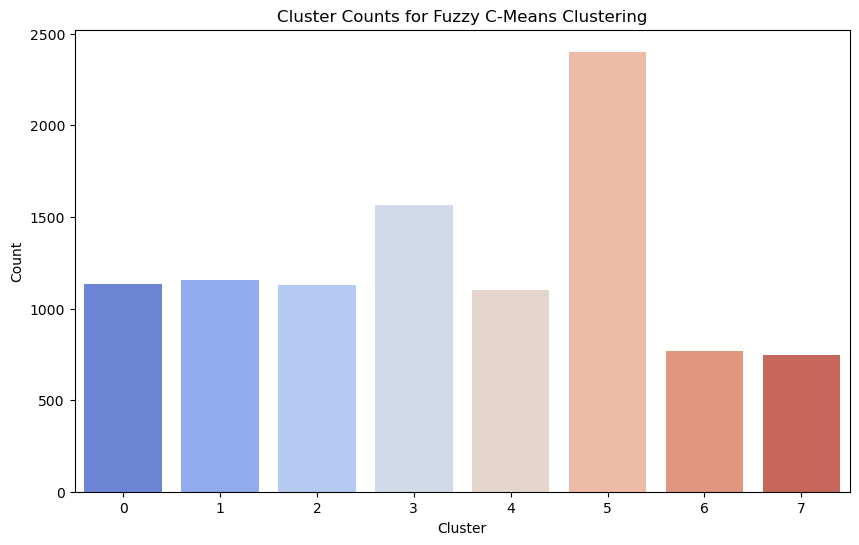

In [66]:
# Step 6: Bar chart for FCM Clustering
plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster_FCM', y='Count', data=cluster_counts_fcm, palette='coolwarm')
plt.title('Cluster Counts for Fuzzy C-Means Clustering')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

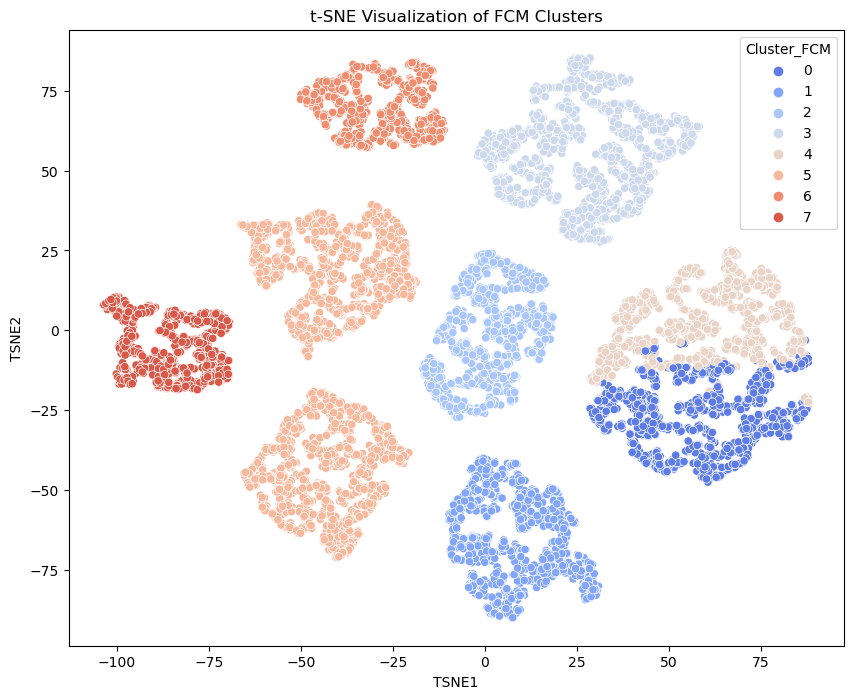

In [67]:
#Visualizing the t-SNE results with FCM Clusters
from sklearn.manifold import TSNE

# Perform t-SNE on the scaled features
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(scaled_features)

# Create a DataFrame with the t-SNE results
df_tsne_fcm = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])
df_tsne_fcm['Cluster_FCM'] = df['Cluster_FCM']  # Add the FCM cluster labels

# Plot the t-SNE results
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='TSNE1', y='TSNE2',
    hue='Cluster_FCM',
    palette=sns.color_palette('coolwarm', len(df['Cluster_FCM'].unique())),
    data=df_tsne_fcm,
    legend='full'
)
plt.title('t-SNE Visualization of FCM Clusters')
plt.show()